<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/basic/13_train_mnist/train_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/13_train
!pip install import-ipynb
#실행이 안될시 인스톨

/content/drive/MyDrive/Colab Notebooks/train
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import import_ipynb  # ipynb 파일을 가져올 수 있도록 설정
#ipynb import 하기
from function import *
from gradient import numerical_gradient 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
#히든레이어 부분 클래스 
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t,n):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if n==1:
          t = np.argmax(t, axis=1)
        elif n==2:
          t = np.argmax(t, axis=0)
        # t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        #grad = network.gradient(x_batch, t_batch)
        #(100,10) (100,) 
        dy = (y - t) / batch_num

        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

def img_show(img):
  image_reshaped = img.reshape(28, 28)
  image_reshaped.shape
  plt.figure(figsize = (4, 4))
  plt.imshow(image_reshaped, cmap="gray")
  plt.show()


time: 1
train acc, test acc | 0.1124  0.1135

time: 2
train acc, test acc | 0.7847  0.7859

time: 3
train acc, test acc | 0.8753  0.8809

time: 4
train acc, test acc | 0.8992  0.9029

time: 5
train acc, test acc | 0.9082  0.9116

time: 6
train acc, test acc | 0.9147  0.9180

time: 7
train acc, test acc | 0.9198  0.9228

time: 8
train acc, test acc | 0.9235  0.9262

time: 9
train acc, test acc | 0.9280  0.9299

time: 10
train acc, test acc | 0.9315  0.9331

time: 11
train acc, test acc | 0.9343  0.9357

time: 12
train acc, test acc | 0.9373  0.9376

time: 13
train acc, test acc | 0.9398  0.9399

time: 14
train acc, test acc | 0.9425  0.9414

time: 15
train acc, test acc | 0.9438  0.9418

time: 16
train acc, test acc | 0.9460  0.9440

time: 17
train acc, test acc | 0.9475  0.9461



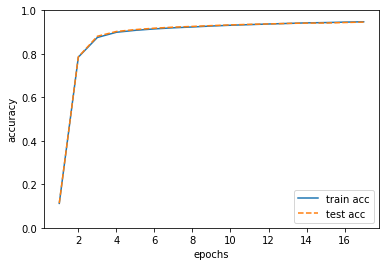

In [ ]:

# 데이터 읽기
mnist = tf.keras.datasets.mnist 
(x_train, t_train), (x_test, t_test) = mnist.load_data()
#데이터 값이 0~255 인것을 0~1로 표준화
x_train,x_test=x_train/255,x_test/255

#데이터 형식을 (x_train.shape,28,28) 인것을 (x_train.shape,784)로 변환
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)
network =TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 라벨의 정답이 써있는 것을 ex) 1일 경우 [0,1,0,0,0,0,0,0,0,0] 로 변환
t_batch=np.zeros((100,10))
T_test = np.zeros((t_test.size, 10))
T_train= np.zeros((t_train.size, 10))
for idx, row in enumerate(t_test):
    T_test[(idx,row)] = 1
for idx, row in enumerate(t_train):
    T_train[(idx,row)]=1

    
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] #60000
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

#데이터를 입력할 리스트 생성
#train_loss 값과  훈련시와 테스트시에 정확도를 추가할 리스트
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) #600회 =60000/100
count=0  # 몇번 600회를 반복 했는지 실행
for i in range(iters_num):
# for i in range(1):
    
    # 미니배치 획득 
    batch_mask = np.random.choice(train_size, batch_size) #60000,600
    x_batch = x_train[batch_mask]
    t_batch = T_train[batch_mask]

    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        count+=1
        train_acc = network.accuracy(x_train, t_train,0)
        test_acc = network.accuracy(x_test, T_test,1)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('time:',count)
        print("train acc, test acc | {0:.4f}  {1:.4f}\n".format(train_acc,test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(1,len(train_acc_list)+1)
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()